# 数据预处理整理

In [1]:
import tensorflow as tf
import keras
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

### 图片

In [2]:
'''**************************************************0. import***************************************************'''
#coding:utf-8
import os
import time
print (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
t0 = time.time()
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow as tf
import keras
from keras.utils import Sequence

base_dir = './SNR_estimation_classification/data_generation/16QAM/20201022'
# 训练、验证和测试的目录
train_dir = os.path.join(base_dir, 'train')   
validation_dir = os.path.join(base_dir, 'val') 
test_dir = os.path.join(base_dir, 'test') 

# 1dB-6dB的train图像目录
train_1dB_dir = os.path.join(train_dir, '1dB')   
train_2dB_dir = os.path.join(train_dir, '2dB')
train_3dB_dir = os.path.join(train_dir, '3dB')
train_4dB_dir = os.path.join(train_dir, '4dB')
train_5dB_dir = os.path.join(train_dir, '5dB')
train_6dB_dir = os.path.join(train_dir, '6dB')

# 1dB-6dB的val图像目录
validation_1dB_dir = os.path.join(validation_dir, '1dB')
validation_2dB_dir = os.path.join(validation_dir, '2dB')
validation_3dB_dir = os.path.join(validation_dir, '3dB')
validation_4dB_dir = os.path.join(validation_dir, '4dB')
validation_5dB_dir = os.path.join(validation_dir, '5dB')
validation_6dB_dir = os.path.join(validation_dir, '6dB')

# 1dB-6dB的val图像目录
test_1dB_dir = os.path.join(test_dir, '1dB')
test_2dB_dir = os.path.join(test_dir, '2dB')
test_3dB_dir = os.path.join(test_dir, '3dB')
test_4dB_dir = os.path.join(test_dir, '4dB')
test_5dB_dir = os.path.join(test_dir, '5dB')
test_6dB_dir = os.path.join(test_dir, '6dB')

'''***************************************************1. load data***************************************************'''
# 数据预处理：使用 ImageDataGenerator 从目录中读取图像
from keras.preprocessing.image import ImageDataGenerator 
# 将所有图像乘以 1/255 缩放
train_datagen = ImageDataGenerator(rescale=1./255)   
test_datagen = ImageDataGenerator(rescale=1./255) 
 
train_generator = train_datagen.flow_from_directory( 
#     目标目录
        train_dir, 
#     将所有图像的大小调整为 150×150
        target_size=(227, 227),   
        batch_size=20, 
        class_mode='categorical')   
 
validation_generator = test_datagen.flow_from_directory( 
        validation_dir, 
        target_size=(227, 227), 
        batch_size=20, 
        class_mode='categorical')

for data_batch, labels_batch in train_generator: 
    print('data batch shape:', data_batch.shape) 
    print('labels batch shape:', labels_batch.shape) 
    break
    


2020-11-19 21:42:38
Found 60000 images belonging to 6 classes.
Found 30000 images belonging to 6 classes.
data batch shape: (20, 227, 227, 3)
labels batch shape: (20, 6)


******************************************************************
creating AlexNet..................................................
******************************************************************
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)       885120    
___________________________________________________

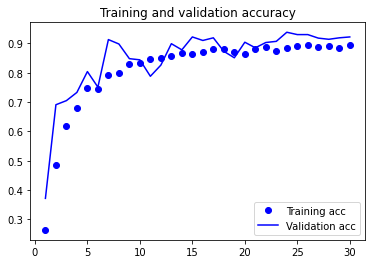

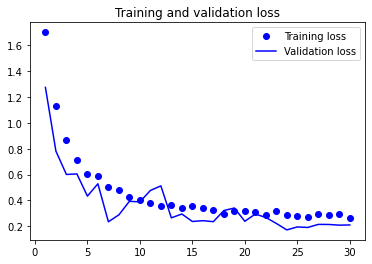

In [4]:
'''***************************************************2. create Net ***************************************************'''
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras import optimizers 
from keras import layers 
from keras import models

print('******************************************************************')
print('creating AlexNet..................................................')
print('******************************************************************')

model = Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(227,227,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))
'''
model = Sequential() 
model.add(Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(227, 227, 3))) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(6, activation='softmax'))#6类识别


from keras.applications import VGG16 
 
conv_base = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(227, 227, 3))
'''


#Compile
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'] 
              )


model_id = np.int64(time.strftime('%Y%m%d%H%M%S', time.localtime(time.time()))) # 时间格式设置
filepath = "AlexNet-20w-{epoch:03d}-{loss:.4f}-"+str(model_id)+".h5"   # 模型保存的路径，命名，格式
checkpoint = ModelCheckpoint(filepath,
                             monitor='loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks_list = [checkpoint]
model.summary()

'''***************************************************3. fit ***************************************************'''
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=30, 
    validation_data=validation_generator, 
    verbose=1,
    shuffle=True, 
    #callbacks=callbacks_list,
    validation_steps=50)   #最大进程数
print (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) )   #输出当前时间
print(time.time() - t0, "seconds wall time")       #经历时长

'''***************************************************4. 绘制训练过程中的损失曲线 ***************************************************'''
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt 
 
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
 
epochs = range(1, len(acc) + 1) 
 
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend() 
 
plt.figure() 
 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 
 
plt.show()

'''
分类/回归问题  输出层使用激活函数  对应的损失函数             优化器

二分类        sigmoid         binary_corssentropy
多分类        softmax         categorical_crossentropy    rmsprop
多标签分类     sigmoid         binary_crossentropy
回归到任意值     linear             mse                         Adam
回归到0-1        sigmoid            mse或binary_crossentropy
'''

### 文本 

2. 使用预训练的词嵌入

在自然语言处理中使用预训练的词嵌入，其背后的原理与在图像分类中使用预训练的卷积神经网络
是一样的：没有足够的数据来自己学习真正强大的特征，但你需要的特征应该是非常通用的，
比如常见的视觉特征或语义特征。在这种情况下，重复使用在其他问题上学到的特征，这种做
法是有道理的。

常用的预计算的词嵌入数据库：word2vec,GloVe

整合在一起：从原始文本到词嵌入

本节的模型与之前刚刚见过的那个类似：将句子嵌入到向量序列中，然后将其展平，最后
在上面训练一个 Dense 层。但此处将使用预训练的词嵌入。此外，我们将从头开始，先下载
IMDB 原始文本数据，而不是使用 Keras 内置的已经预先分词的 IMDB 数据。


In [ ]:
#1. 下载 IMDB 数据的原始文本
#接下来，我们将训练评论转换成字符串列表，每个字符串对应一条评论。你也可以将评论标签（正面 / 负面）转换成 labels 列表
#处理 IMDB 原始数据的标签
import os
import numpy as np
import string
 
imdb_dir = './data/aclImdb' 
train_dir = os.path.join(imdb_dir, 'train') 
 
labels = [] 
texts = [] 
 
for label_type in ['neg', 'pos']: 
    dir_name = os.path.join(train_dir, label_type) 
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt': 
            f = open(os.path.join(dir_name, fname),'r',encoding='UTF-8') 
            texts.append(f.read()) 
            f.close() 
            if label_type == 'neg': 
                labels.append(0) 
            else: 
                labels.append(1)
'''
"UnicodeDecodeError: 'gbk' codec can't decode byte 0x80 in position 205: illegal multibyte sequence"
Solution 1. FILE_OBJECT= open('order.log','r', encoding='UTF-8')
Solution 2. FILE_OBJECT= open('order.log','rb')
'''

In [ ]:
#2.对数据进行分析
#对 IMDB 原始数据的文本进行分词
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
import numpy as np 
 
maxlen = 100  #在 100 个单词后截断评论
training_samples = 200   #在 200 个样本上训练
validation_samples = 10000  #在 10 000 个样本上验证
max_words = 10000  #只考虑数据集中前 10 000 个最常见的单词
 
tokenizer = Tokenizer(num_words=max_words) 
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts) 

# tokenizer = Tokenizer(num_words=1000)   #创建一个分词器（tokenizer），设置为只考虑前 1000 个最常见的单词
# tokenizer.fit_on_texts(samples)   #构建单词索引
# sequences = tokenizer.texts_to_sequences(samples)   #将字符串转换为整数索引组成的列表
 
word_index = tokenizer.word_index 
print('Found %s unique tokens.' % len(word_index)) 
 
data = pad_sequences(sequences, maxlen=maxlen) #maxlen=100
 
labels = np.asarray(labels) 
print('Shape of data tensor:', data.shape) 
print('Shape of label tensor:', labels.shape) 
 
indices = np.arange(data.shape[0])  
# 将数据划分为训练集和验证集，但首先要打乱数据，因为一开始数据中的样本
# 是排好序的（所有负面评论都在前面，然后是所有正面评论）
np.random.shuffle(indices) 
data = data[indices] 
labels = labels[indices] 
 
x_train = data[:training_samples] #training_samples=200
y_train = labels[:training_samples] 
x_val = data[training_samples: training_samples + validation_samples]  
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
#3.对嵌入进行预处理
# 解析 GloVe 词嵌入文件
glove_dir = './data/glove.6B' 
 
embeddings_index = {} 
#f = open(os.path.join(glove_dir, 'glove.6B.100d.txt')) 
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),'r',encoding='UTF-8') 
for line in f: 
    values = line.split() 
    word = values[0] 
    coefs = np.asarray(values[1:], dtype='float32') 
    embeddings_index[word] = coefs 
f.close() 
 
print('Found %s word vectors.' % len(embeddings_index))


In [ ]:
#4. 准备 GloVe 词嵌入矩阵
embedding_dim = 100 
 
embedding_matrix = np.zeros((max_words, embedding_dim)) 
for word, i in word_index.items(): 
    if i < max_words: 
        embedding_vector = embeddings_index.get(word) 
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector #嵌入索引（embeddings_index）中找不到的词，其嵌入向量全为 0

In [ ]:
#5.定义模型
# 模型定义
from keras.models import Sequential 
from keras.layers import Embedding, Flatten, Dense 
 
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) 
model.add(Flatten()) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.summary()

#6.在模型中加入GloVe嵌入
# 将预训练的词嵌入加载到 Embedding 层中
model.layers[0].set_weights([embedding_matrix]) 
model.layers[0].trainable = False

#7. 训练模型与评估模型
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc']) 
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val)) 
model.save_weights('pre_trained_glove_model.h5')

import matplotlib.pyplot as plt 
 
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
 
epochs = range(1, len(acc) + 1) 
 
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure() 
 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 
 
plt.show()

In [ ]:
#最后，我们在测试数据上评估模型。首先，你需要对测试数据进行分词。
test_dir = os.path.join(imdb_dir, 'test') 
 
labels = [] 
texts = [] 
 
for label_type in ['neg', 'pos']: 
    dir_name = os.path.join(test_dir, label_type) 
    for fname in sorted(os.listdir(dir_name)): 
        if fname[-4:] == '.txt': 
            f = open(os.path.join(dir_name, fname),'r',encoding='UTF-8') 
            texts.append(f.read()) 
            f.close() 
            if label_type == 'neg': 
                labels.append(0) 
            else: 
                labels.append(1) 
 
sequences = tokenizer.texts_to_sequences(texts) 
x_test = pad_sequences(sequences, maxlen=maxlen) 
y_test = np.asarray(labels)

### 序列

In [ ]:
import os
import matplotlib.pyplot as plt 
 
data_dir = './data/jena_climate' 
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv') 
 
f = open(fname) 
data = f.read() 
f.close() 
 
lines = data.split('\n') 
header = lines[0].split(',') 
lines = lines[1:] 
 
print(header) 
print(len(lines))

# 从输出可以看出，共有 420 551 行数据（每行是一个时间步，记录了一个日期和 14 个与天
# 气有关的值），还输出了下列表头。

# 接下来，将 420 551 行数据转换成一个 Numpy 数组。
# 解析数据
import numpy as np 
 
float_data = np.zeros((len(lines), len(header) - 1)) 
for i, line in enumerate(lines): 
    values = [float(x) for x in line.split(',')[1:]] 
    float_data[i, :] = values
    
# # 绘制温度时间序列
# from matplotlib import pyplot as plt 
# temp = float_data[:, 1]  # 温度（单位：摄氏度） 
# plt.plot(range(len(temp)), temp)
# # 绘制前 10 天的温度时间序列
# plt.plot(range(1440), temp[:1440]) #1440=10*24*6
    
#准备数据
'''
这个问题的确切表述如下：一个时间步是 10 分钟，每 steps 个时间步采样一次数据，给
定过去 lookback 个时间步之内的数据，能否预测 delay 个时间步之后的温度？用到的参数值
如下。
  lookback = 720：给定过去 5 天内的观测数据。
  steps = 6：观测数据的采样频率是每小时一个数据点。
  delay = 144：目标是未来 24 小时之后的数据。
 
开始之前，你需要完成以下两件事。
  将数据预处理为神经网络可以处理的格式。这很简单。数据已经是数值型的，所以不需
要做向量化。但数据中的每个时间序列位于不同的范围（比如温度通道位于 -20 到 +30
之间，但气压大约在 1000 毫巴上下）。你需要对每个时间序列分别做标准化，让它们在
相似的范围内都取较小的值。
  编写一个 Python 生成器，以当前的浮点数数组作为输入，并从最近的数据中生成数据批
量，同时生成未来的目标温度。因为数据集中的样本是高度冗余的（对于第 N 个样本和
第 N+1 个样本，大部分时间步都是相同的），所以显式地保存每个样本是一种浪费。相反，
我们将使用原始数据即时生成样本。


'''

#数据标准化
# 预处理数据的方法是，将每个时间序列减去其平均值，然后除以其标准差。我们将使用前
# 200 000 个时间步作为训练数据，所以只对这部分数据计算平均值和标准差。
mean = float_data[:200000].mean(axis=0) 
float_data -= mean 
std = float_data[:200000].std(axis=0) 
float_data /= std

# 生成时间序列样本及其目标的生成器
'''
给出了将要用到的生成器。它生成了一个元组 (samples, targets)，其
中 samples 是输入数据的一个批量，targets 是对应的目标温度数组。生成器的参数如下。
  data：浮点数数据组成的原始数组，在上一步中将其标准化。
  lookback：输入数据应该包括过去多少个时间步。
  delay：目标应该在未来多少个时间步之后。
  min_index 和 max_index：data 数组中的索引，用于界定需要抽取哪些时间步。这有
助于保存一部分数据用于验证、另一部分用于测试。
  shuffle：是打乱样本，还是按顺序抽取样本。
  batch_size：每个批量的样本数。
  step：数据采样的周期（单位：时间步）。我们将其设为 6，为的是每小时抽取一个数据点。
'''
def generator(data, lookback, delay, min_index, max_index, 
              shuffle=False, batch_size=128, step=6): 
    if max_index is None: 
        max_index = len(data) - delay - 1 
    i = min_index + lookback 
    while 1: 
        if shuffle: 
            rows = np.random.randint( 
                min_index + lookback, max_index, size=batch_size) 
        else: 
            if i + batch_size >= max_index: 
                i = min_index + lookback 
            rows = np.arange(i, min(i + batch_size, max_index)) 
            i += len(rows) 
 
        samples = np.zeros((len(rows), 
                           lookback // step, 
                           data.shape[-1])) 
        targets = np.zeros((len(rows),)) 
        for j, row in enumerate(rows): 
            indices = range(rows[j] - lookback, rows[j], step) 
            samples[j] = data[indices] 
            targets[j] = data[rows[j] + delay][1] 
        yield samples, targets
        
        
# 准备训练生成器、验证生成器和测试生成器
'''
下面，我们使用这个抽象的 generator 函数来实例化三个生成器：一个用于训练，一个用于验证，
还有一个用于测试。每个生成器分别读取原始数据的不同时间段：训练生成器读取前
200 000 个时间步，验证生成器读取随后的 100 000 个时间步，测试生成器读取剩下的时间步。
'''
lookback = 1440 #前10天作为输入数据 6*24*10=1440
step = 6 
delay = 144 
batch_size = 32 #128 64
 
train_gen = generator(float_data, 
                      lookback=lookback, 
                      delay=delay, 
                      min_index=0, 
                      max_index=200000, 
                      shuffle=True, 
                      step=step, 
                      batch_size=batch_size) 
val_gen = generator(float_data, 
                    lookback=lookback, 
                    delay=delay, 
                    min_index=200001, 
                    max_index=300000, 
                    step=step, 
                    batch_size=batch_size) 
test_gen = generator(float_data, 
                     lookback=lookback, 
                     delay=delay, 
                     min_index=300001, 
                     max_index=None, 
                     step=step, 
                     batch_size=batch_size) 
 
val_steps = (300000 - 200001 - lookback)  //batch_size  
# 为了查看整个验证集，需要从 val_gen 中抽取多少次
test_steps = (len(float_data) - 300001 - lookback)  //batch_size
# 为了查看整个测试集，需要从test_gen 中抽取多少次

# 计算符合常识的基准方法的 MAE
'''
如果数据集中包含
90% 的类别 A 实例和 10% 的类别 B 实例，那么分类任务的一种基于常识的方法就是对新样本
始终预测类别“A”。这种分类器的总体精度为 90%，因此任何基于学习的方法在精度高于 90%
时才能证明其有效性。

本例中，我们可以放心地假设，温度时间序列是连续的（明天的温度很可能接近今天的温
度），并且具有每天的周期性变化。因此，一种基于常识的方法就是始终预测 24 小时后的温度
等于现在的温度。我们使用平均绝对误差（MAE）指标来评估这种方法。
np.mean(np.abs(preds - targets))
'''
def evaluate_naive_method(): 
    batch_maes = [] 
    for step in range(val_steps): 
        samples, targets = next(val_gen) 
        preds = samples[:, -1, 1] 
        mae = np.mean(np.abs(preds - targets)) 
        batch_maes.append(mae) 
    print(np.mean(batch_maes)) 
 
evaluate_naive_method()
# 得到的 MAE 为 0.29。因为温度数据被标准化成均值为 0、标准差为 1，所以无法直接对这
# 个值进行解释。它转化成温度的平均绝对误差为 0.29×temperature_std 摄氏度，即 2.57℃。

# 将 MAE 转换成摄氏温度误差
celsius_mae = 0.29 * std[1]

In [ ]:
# 训练并评估一个密集连接模型
'''
在开始研究复杂且计算代价很高的模型（比如 RNN）之前，尝试使用简单且计算代价低的机器学习模型也
是很有用的，比如小型的密集连接网络。这可以保证进一步增加问题的复杂度是合理的，并且会带来真正的好处。
'''
from keras.models import Sequential  
from keras import layers 
from keras.optimizers import RMSprop 
 
model = Sequential() 
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1]))) 
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')  
history = model.fit_generator(train_gen, 
                              steps_per_epoch=500,  
                              epochs=20,  
                              validation_data=val_gen,  
                              validation_steps=val_steps)

from keras.utils import plot_model 
 
plot_model(model, show_shapes=True, to_file='model.png')


 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
 
epochs = range(1, len(loss) + 1) 
 
plt.figure() 
 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 
 
plt.show()